In [2]:
#For a given dataset predict number of bikes getting shared based on temperature of the day
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Importing the dataset
data = pd.read_csv('bike_sharing.csv',sep=',')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
data.shape

(17379, 17)

In [12]:
X = data['temp'].values
Y = data.iloc[:,-1].values
X

array([0.24, 0.22, 0.22, ..., 0.26, 0.26, 0.26])

In [13]:
Y

array([16, 40, 32, ..., 90, 61, 49], dtype=int64)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33,random_state = 0)

In [35]:
x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [36]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [37]:
y_pred = regressor.predict(x_test)
y_pred

array([[212.66727655],
       [167.46464168],
       [167.46464168],
       ...,
       [288.00500133],
       [235.26859398],
       [318.14009125]])

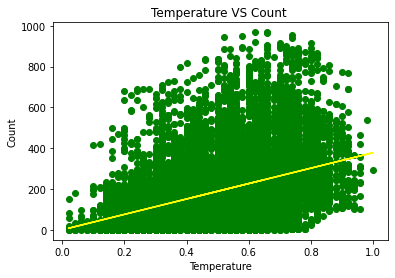

In [38]:
#Visualizing the training set
plt.scatter(x_train,y_train,color="green")
plt.plot(x_train,regressor.predict(x_train),color="yellow")
plt.title("Temperature VS Count ")
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.show()

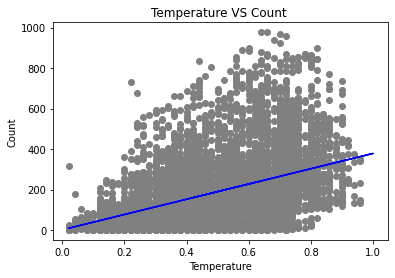

In [40]:
#Visualizing the testing set
plt.scatter(x_test,y_test,color="gray")
plt.plot(x_train,regressor.predict(x_train),color="blue")
plt.title("Temperature VS Count ")
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.show()

In [41]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)                          

print("RMSE =", rmse)
print("R2 Score=",r2)

RMSE = 165.41220585747828
R2 Score= 0.1716637983079211
